### OUTLIER Analysis

### BOXPLOT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df=pd.read_csv('Visadataset.csv')

In [3]:
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


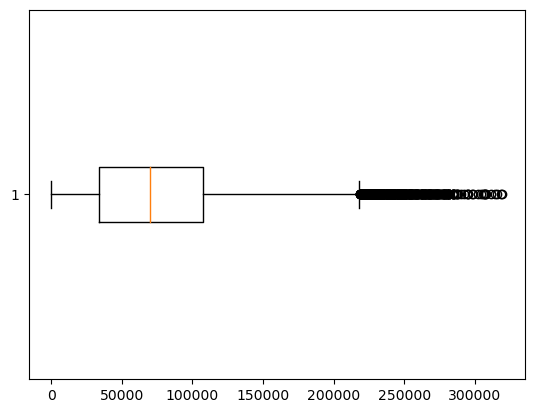

In [4]:
plt.boxplot(visa_df['prevailing_wage'],vert=False)
plt.show()

<Axes: >

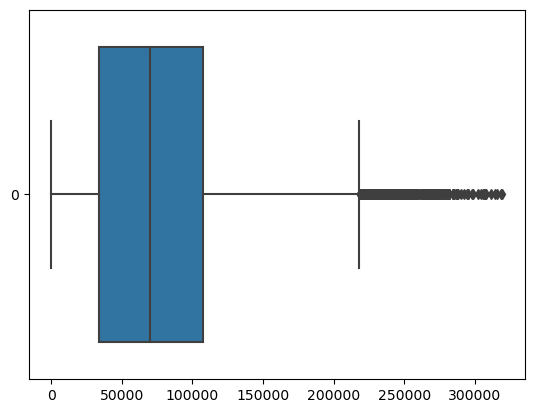

In [5]:
sns.boxplot(visa_df['prevailing_wage'],orient="h")

{'whiskers': [<matplotlib.lines.Line2D at 0x1f42e433190>,
 'caps': [<matplotlib.lines.Line2D at 0x1f42e438a10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f42e432590>],
 'medians': [<matplotlib.lines.Line2D at 0x1f42e43a090>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f42e43aa50>],
 'means': []}

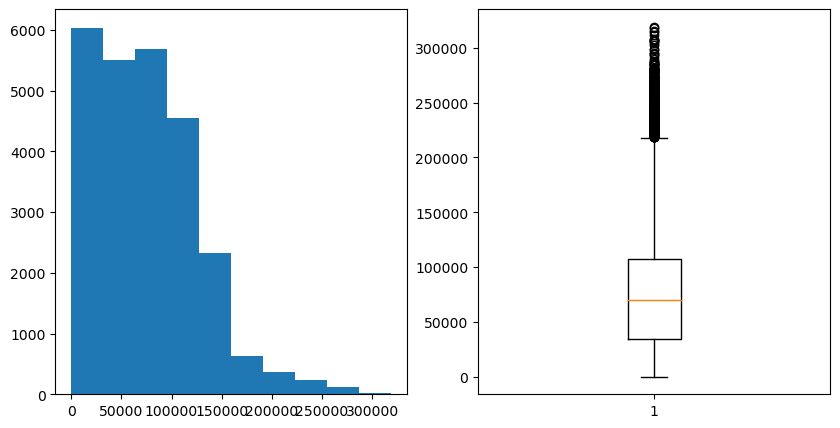

In [6]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'],bins=10)
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])

### Finding the outliers

In [7]:
q1=np.percentile(visa_df['prevailing_wage'],25)
q3=np.percentile(visa_df['prevailing_wage'],75)
IQR=q3-q1
LB=q1-1.5*IQR
UB=q3+1.5*IQR
cond1=visa_df['prevailing_wage']<LB
cond2=visa_df['prevailing_wage']>UB
outlier_data=visa_df[cond1 | cond2]
non_outlier_data=visa_df[~(cond1 | cond2)]
len(non_outlier_data)

25053

comparing total data with non oulier data

{'whiskers': [<matplotlib.lines.Line2D at 0x1f42ea0e1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f42ea0f990>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f42ea0d690>],
 'medians': [<matplotlib.lines.Line2D at 0x1f42ea1cf90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f42ea0f490>],
 'means': []}

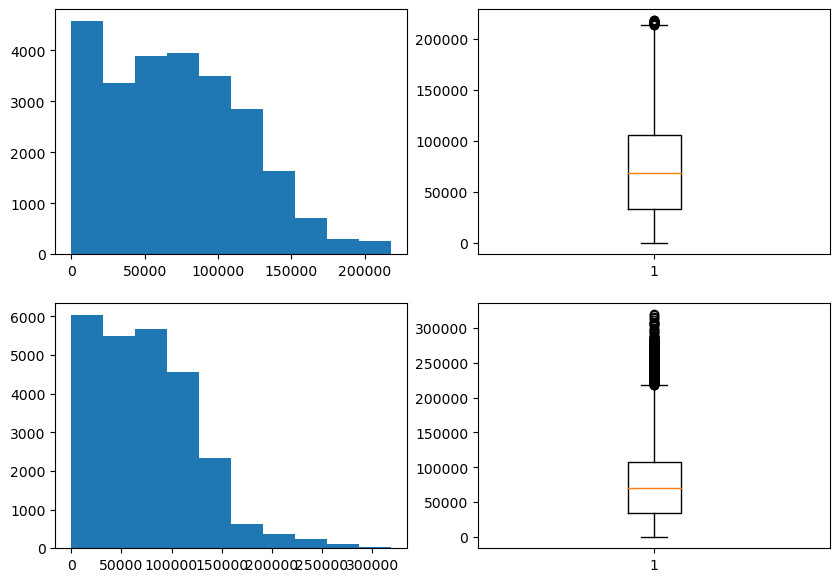

In [8]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1).hist(non_outlier_data['prevailing_wage'])
plt.subplot(2,2,2).boxplot(non_outlier_data['prevailing_wage'])
plt.subplot(2,2,3).hist(visa_df['prevailing_wage'])
plt.subplot(2,2,4).boxplot(visa_df['prevailing_wage'])

fill with median

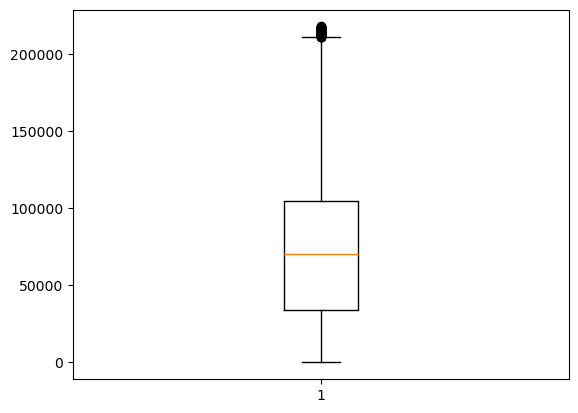

In [9]:
l=[]
for i in visa_df['prevailing_wage'].values:
    if(i<LB or i>UB):
        l.append(visa_df['prevailing_wage'].median())
    else:
        l.append(i)

visa_df_copy=visa_df.copy()
visa_df_copy['prevailing_wage']=l
plt.boxplot(visa_df_copy['prevailing_wage'])
plt.show()

np.where

In [10]:
d={"sub":['Ds','ML','CS'],
    "Marks":[100,150,20]}
data=pd.DataFrame(d)

In [11]:
cond=data['Marks']>100
l=np.where(cond,1,data['Marks'])
l

array([100,   1,  20], dtype=int64)

In [3]:
cond1=visa_df['prevailing_wage']>UB 
cond2=visa_df['prevailing_wage']<LB
cond=cond1|cond2
l=np.where(cond,visa_df['prevailing_wage'].median(),visa_df['prevailing_wage'])


NameError: name 'visa_df' is not defined

<class 'pandas.core.series.Series'>
RangeIndex: 25480 entries, 0 to 25479
Series name: prevailing_wage
Non-Null Count  Dtype  
--------------  -----  
25480 non-null  float64
dtypes: float64(1)
memory usage: 199.2 KB
